In [46]:
import pandas as pd
import numpy as np

In [47]:
data=pd.read_csv(r'C:\Users\tando\Downloads\archive (6)\rideshare_kaggle.csv')

In [48]:
df=pd.DataFrame(data)

In [49]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [50]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [51]:
df.shape

(693071, 57)

In [52]:
(55095/693071)*100

7.949402009317949

In [53]:
df.price.mean()

16.545125490614065

In [54]:
df=df.fillna(df.price.mean())

In [55]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [56]:
df.duplicated().sum()

0

# for unsupervised algo for booking area using an Unsupervised algorithm

In [13]:
cluster_data = df[['latitude', 'longitude']]


In [14]:
cluster_data

,latitude,longitude
0,42.2148,-71.0330
1,42.2148,-71.0330
2,42.2148,-71.0330
3,42.2148,-71.0330
4,42.2148,-71.0330
...,...,...
693066,42.3519,-71.0643
693067,42.3519,-71.0643
693068,42.3519,-71.0643
693069,42.3519,-71.0643


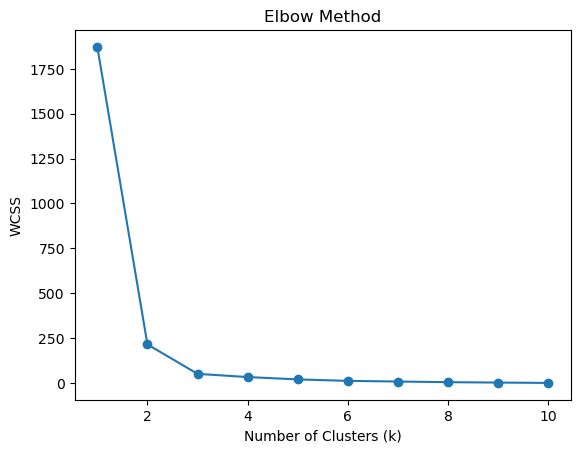

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


cluster_data = dfc[['latitude', 'longitude']]


k_values = range(1, 11)
wcss_values = []

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_data)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [30]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  
kmeans.fit(cluster_data)


KMeans(n_clusters=3)

In [31]:
dfc=df.copy()

In [32]:
dfc['cluster_label'] = kmeans.labels_


In [33]:
dfc

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cluster_label
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,1
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,1
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,1
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0


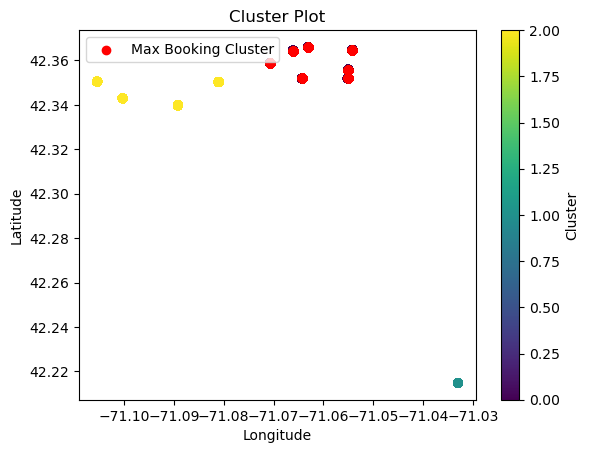

In [34]:
import matplotlib.pyplot as plt

# Count the number of data points in each cluster
cluster_counts = dfc['cluster_label'].value_counts()

# Find the cluster with the maximum booking count
max_booking_cluster = cluster_counts.idxmax()

# Plot the clusters
plt.scatter(dfc['longitude'], dfc['latitude'], c=dfc['cluster_label'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot')

# Highlight the cluster with maximum booking
max_booking_cluster_points = dfc[dfc['cluster_label'] == max_booking_cluster]
plt.scatter(max_booking_cluster_points['longitude'], max_booking_cluster_points['latitude'], c='red', label='Max Booking Cluster')

plt.legend()
plt.show()33


In [36]:
cluster_counts

0    416630
2    187895
1     88546
Name: cluster_label, dtype: int64

# for price using supervised algorithm

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        693071 non-null  float64
 13 

In [41]:
df.datetime

0         2018-12-16 09:30:07
1         2018-11-27 02:00:23
2         2018-11-28 01:00:22
3         2018-11-30 04:53:02
4         2018-11-29 03:49:20
                 ...         
693066    2018-12-01 23:53:05
693067    2018-12-01 23:53:05
693068    2018-12-01 23:53:05
693069    2018-12-01 23:53:05
693070    2018-12-01 23:53:05
Name: datetime, Length: 693071, dtype: object

In [42]:
# changing date time to hours

In [62]:
df=df.drop(['id','timestamp'],axis=1)

In [63]:
df

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.000000,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.000000,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.000000,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.000000,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.000000,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.000000,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.500000,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.545125,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,23,1,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.000000,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [64]:
# encoding to convert categorical to numericsal

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [71]:
object_columns

['timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [73]:
for col in object_columns:
    df[col] = le.fit_transform(df[col])


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  int64  
 1   day                          693071 non-null  int64  
 2   month                        693071 non-null  int64  
 3   timezone                     693071 non-null  int32  
 4   source                       693071 non-null  int32  
 5   destination                  693071 non-null  int32  
 6   cab_type                     693071 non-null  int32  
 7   product_id                   693071 non-null  int32  
 8   name                         693071 non-null  int32  
 9   price                        693071 non-null  float64
 10  distance                     693071 non-null  float64
 11  surge_multiplier             693071 non-null  float64
 12  latitude                     693071 non-null  float64
 13 

In [77]:
X=df.drop(['price'],axis=1)
y=df['price']

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

# Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)



LinearRegression()

In [82]:
# Evaluate the model
mse = np.mean((regression_model.predict(X_test) - y_test) ** 2)
mae = np.mean(np.abs(regression_model.predict(X_test) - y_test))

In [79]:
mse

38.01327829253946

In [80]:
mae

4.858221600942712